In [108]:
import pandas as pd
import numpy as np

In [109]:
#Importation de données
Data= pd.read_excel("simul_survie.xlsx")
Data

,ID_compte,date_observation,date_defaut,date_fermeture,age,revenu,Jrs_delinquance,chomage
0,1,2018-01-13,NaT,2019-01-13,34,82154,36,1
1,2,2018-01-17,2018-02-16,NaT,30,35846,44,1
2,3,2018-02-19,2018-06-20,NaT,61,88817,42,1
3,4,2018-03-05,2018-06-04,NaT,26,57955,42,1
4,5,2018-03-20,2018-04-19,NaT,51,64280,26,1
...,...,...,...,...,...,...,...,...
95,96,2020-11-20,NaT,2021-06-19,30,52825,41,1
96,97,2020-12-07,2021-05-07,NaT,58,65103,34,1
97,98,2020-12-18,2021-06-17,NaT,58,99805,32,0
98,99,2020-12-26,2021-05-26,NaT,71,97661,47,0


In [110]:
Data.dtypes

ID_compte                    int64
date_observation    datetime64[ns]
date_defaut         datetime64[ns]
date_fermeture      datetime64[ns]
age                          int64
revenu                       int64
Jrs_delinquance              int64
chomage                      int64
dtype: object

In [111]:
# la date de début de l'étude est le 01-01-2018

# definir la date de fin de l'étude
date_fin = pd.to_datetime("31DEC2023", format="%d%b%Y")
date_fin

Timestamp('2023-12-31 00:00:00')

In [112]:
# Création de la variable de censure en variable dummy

Data['Censure'] = Data['date_defaut'].notna().astype(int)
Data

,ID_compte,date_observation,date_defaut,date_fermeture,age,revenu,Jrs_delinquance,chomage,Censure
0,1,2018-01-13,NaT,2019-01-13,34,82154,36,1,0
1,2,2018-01-17,2018-02-16,NaT,30,35846,44,1,1
2,3,2018-02-19,2018-06-20,NaT,61,88817,42,1,1
3,4,2018-03-05,2018-06-04,NaT,26,57955,42,1,1
4,5,2018-03-20,2018-04-19,NaT,51,64280,26,1,1
...,...,...,...,...,...,...,...,...,...
95,96,2020-11-20,NaT,2021-06-19,30,52825,41,1,0
96,97,2020-12-07,2021-05-07,NaT,58,65103,34,1,1
97,98,2020-12-18,2021-06-17,NaT,58,99805,32,0,1
98,99,2020-12-26,2021-05-26,NaT,71,97661,47,0,1


In [113]:
# Calcul du temps de survie

def compute_survie(df):
    if pd.notna(df['date_defaut']):
        return (df['date_defaut'] - df['date_observation']).days // 30
    elif pd.notna(df['date_fermeture']):
        return (min(df['date_fermeture'], date_fin) - df['date_observation']).days // 30
    else:
        return (date_fin - df['date_observation']).days // 30

Data['Survie'] = Data.apply(compute_survie, axis=1)
Data

,ID_compte,date_observation,date_defaut,date_fermeture,age,revenu,Jrs_delinquance,chomage,Censure,Survie
0,1,2018-01-13,NaT,2019-01-13,34,82154,36,1,0,12
1,2,2018-01-17,2018-02-16,NaT,30,35846,44,1,1,1
2,3,2018-02-19,2018-06-20,NaT,61,88817,42,1,1,4
3,4,2018-03-05,2018-06-04,NaT,26,57955,42,1,1,3
4,5,2018-03-20,2018-04-19,NaT,51,64280,26,1,1,1
...,...,...,...,...,...,...,...,...,...,...
95,96,2020-11-20,NaT,2021-06-19,30,52825,41,1,0,7
96,97,2020-12-07,2021-05-07,NaT,58,65103,34,1,1,5
97,98,2020-12-18,2021-06-17,NaT,58,99805,32,0,1,6
98,99,2020-12-26,2021-05-26,NaT,71,97661,47,0,1,5


In [114]:
Data.isnull().count()

ID_compte           100
date_observation    100
date_defaut         100
date_fermeture      100
age                 100
revenu              100
Jrs_delinquance     100
chomage             100
Censure             100
Survie              100
dtype: int64

In [115]:
Data.head(15)

,ID_compte,date_observation,date_defaut,date_fermeture,age,revenu,Jrs_delinquance,chomage,Censure,Survie
0,1,2018-01-13,NaT,2019-01-13,34,82154,36,1,0,12
1,2,2018-01-17,2018-02-16,NaT,30,35846,44,1,1,1
2,3,2018-02-19,2018-06-20,NaT,61,88817,42,1,1,4
3,4,2018-03-05,2018-06-04,NaT,26,57955,42,1,1,3
4,5,2018-03-20,2018-04-19,NaT,51,64280,26,1,1,1
5,6,2018-04-20,2019-03-20,NaT,49,74475,39,1,1,11
6,7,2018-04-20,2018-09-19,NaT,29,53039,46,1,1,5
7,8,2018-04-26,2019-01-24,NaT,28,92935,36,0,1,9
8,9,2018-05-11,2018-06-10,NaT,62,45688,34,1,1,1
9,10,2018-05-13,2021-12-10,NaT,62,98701,25,0,1,43


In [116]:
Data.isnull().count()

ID_compte           100
date_observation    100
date_defaut         100
date_fermeture      100
age                 100
revenu              100
Jrs_delinquance     100
chomage             100
Censure             100
Survie              100
dtype: int64

In [117]:
# Suppression des lignes où Survie == 0
Data = Data[Data['Survie'] != 0]
Data
# Mais dans notre cas il n'existe pas de  Survie == 0

,ID_compte,date_observation,date_defaut,date_fermeture,age,revenu,Jrs_delinquance,chomage,Censure,Survie
0,1,2018-01-13,NaT,2019-01-13,34,82154,36,1,0,12
1,2,2018-01-17,2018-02-16,NaT,30,35846,44,1,1,1
2,3,2018-02-19,2018-06-20,NaT,61,88817,42,1,1,4
3,4,2018-03-05,2018-06-04,NaT,26,57955,42,1,1,3
4,5,2018-03-20,2018-04-19,NaT,51,64280,26,1,1,1
...,...,...,...,...,...,...,...,...,...,...
95,96,2020-11-20,NaT,2021-06-19,30,52825,41,1,0,7
96,97,2020-12-07,2021-05-07,NaT,58,65103,34,1,1,5
97,98,2020-12-18,2021-06-17,NaT,58,99805,32,0,1,6
98,99,2020-12-26,2021-05-26,NaT,71,97661,47,0,1,5


In [118]:
# La statistque descriptive
Data.describe()

,ID_compte,age,revenu,Jrs_delinquance,chomage,Censure,Survie
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,47.070000,68446.950000,36.070000,0.490000,0.800000,11.230000
std,29.011492,16.576273,19133.220607,6.700302,0.502418,0.402015,14.896176
min,1.000000,18.000000,35450.000000,20.000000,0.000000,0.000000,1.000000
25%,25.750000,30.000000,51686.000000,32.000000,0.000000,1.000000,2.000000
50%,50.500000,47.000000,71195.500000,35.000000,0.000000,1.000000,5.000000
75%,75.250000,60.250000,85561.250000,41.000000,1.000000,1.000000,11.250000
max,100.000000,77.000000,99805.000000,54.000000,1.000000,1.000000,58.000000


In [119]:
# Analyse fondamentale des variables 

# Âge du client           +
# Chômage                 -
# Revenu                  +
# Jours de délinquance    -
# Niveau d'instruction    +

In [120]:
Data['L_revenu']= np.log(Data['revenu'])
Data

,ID_compte,date_observation,date_defaut,date_fermeture,age,revenu,Jrs_delinquance,chomage,Censure,Survie,L_revenu
0,1,2018-01-13,NaT,2019-01-13,34,82154,36,1,0,12,11.316351
1,2,2018-01-17,2018-02-16,NaT,30,35846,44,1,1,1,10.486987
2,3,2018-02-19,2018-06-20,NaT,61,88817,42,1,1,4,11.394333
3,4,2018-03-05,2018-06-04,NaT,26,57955,42,1,1,3,10.967422
4,5,2018-03-20,2018-04-19,NaT,51,64280,26,1,1,1,11.071004
...,...,...,...,...,...,...,...,...,...,...,...
95,96,2020-11-20,NaT,2021-06-19,30,52825,41,1,0,7,10.874740
96,97,2020-12-07,2021-05-07,NaT,58,65103,34,1,1,5,11.083726
97,98,2020-12-18,2021-06-17,NaT,58,99805,32,0,1,6,11.510974
98,99,2020-12-26,2021-05-26,NaT,71,97661,47,0,1,5,11.489258


In [121]:
## Recoder les variables categorielles en dummies
# parametrage des variables

df = Data.drop('ID_compte', axis=1)
df

,date_observation,date_defaut,date_fermeture,age,revenu,Jrs_delinquance,chomage,Censure,Survie,L_revenu
0,2018-01-13,NaT,2019-01-13,34,82154,36,1,0,12,11.316351
1,2018-01-17,2018-02-16,NaT,30,35846,44,1,1,1,10.486987
2,2018-02-19,2018-06-20,NaT,61,88817,42,1,1,4,11.394333
3,2018-03-05,2018-06-04,NaT,26,57955,42,1,1,3,10.967422
4,2018-03-20,2018-04-19,NaT,51,64280,26,1,1,1,11.071004
...,...,...,...,...,...,...,...,...,...,...
95,2020-11-20,NaT,2021-06-19,30,52825,41,1,0,7,10.874740
96,2020-12-07,2021-05-07,NaT,58,65103,34,1,1,5,11.083726
97,2020-12-18,2021-06-17,NaT,58,99805,32,0,1,6,11.510974
98,2020-12-26,2021-05-26,NaT,71,97661,47,0,1,5,11.489258


In [122]:
Data.dtypes

ID_compte                    int64
date_observation    datetime64[ns]
date_defaut         datetime64[ns]
date_fermeture      datetime64[ns]
age                          int64
revenu                       int64
Jrs_delinquance              int64
chomage                      int64
Censure                      int32
Survie                       int64
L_revenu                   float64
dtype: object

In [123]:
# Vérification des types de colonnes
Data['Survie'] = pd.to_numeric(Data['Survie'], errors='coerce')  # Conversion en numérique
Data

,ID_compte,date_observation,date_defaut,date_fermeture,age,revenu,Jrs_delinquance,chomage,Censure,Survie,L_revenu
0,1,2018-01-13,NaT,2019-01-13,34,82154,36,1,0,12,11.316351
1,2,2018-01-17,2018-02-16,NaT,30,35846,44,1,1,1,10.486987
2,3,2018-02-19,2018-06-20,NaT,61,88817,42,1,1,4,11.394333
3,4,2018-03-05,2018-06-04,NaT,26,57955,42,1,1,3,10.967422
4,5,2018-03-20,2018-04-19,NaT,51,64280,26,1,1,1,11.071004
...,...,...,...,...,...,...,...,...,...,...,...
95,96,2020-11-20,NaT,2021-06-19,30,52825,41,1,0,7,10.874740
96,97,2020-12-07,2021-05-07,NaT,58,65103,34,1,1,5,11.083726
97,98,2020-12-18,2021-06-17,NaT,58,99805,32,0,1,6,11.510974
98,99,2020-12-26,2021-05-26,NaT,71,97661,47,0,1,5,11.489258


In [124]:
# Vérification des types de colonnes
Data['Censure'] = Data['Censure'].astype(int)  # Conversion en int (0 ou 1)
Data

,ID_compte,date_observation,date_defaut,date_fermeture,age,revenu,Jrs_delinquance,chomage,Censure,Survie,L_revenu
0,1,2018-01-13,NaT,2019-01-13,34,82154,36,1,0,12,11.316351
1,2,2018-01-17,2018-02-16,NaT,30,35846,44,1,1,1,10.486987
2,3,2018-02-19,2018-06-20,NaT,61,88817,42,1,1,4,11.394333
3,4,2018-03-05,2018-06-04,NaT,26,57955,42,1,1,3,10.967422
4,5,2018-03-20,2018-04-19,NaT,51,64280,26,1,1,1,11.071004
...,...,...,...,...,...,...,...,...,...,...,...
95,96,2020-11-20,NaT,2021-06-19,30,52825,41,1,0,7,10.874740
96,97,2020-12-07,2021-05-07,NaT,58,65103,34,1,1,5,11.083726
97,98,2020-12-18,2021-06-17,NaT,58,99805,32,0,1,6,11.510974
98,99,2020-12-26,2021-05-26,NaT,71,97661,47,0,1,5,11.489258


In [125]:
Data.dtypes

ID_compte                    int64
date_observation    datetime64[ns]
date_defaut         datetime64[ns]
date_fermeture      datetime64[ns]
age                          int64
revenu                       int64
Jrs_delinquance              int64
chomage                      int64
Censure                      int32
Survie                       int64
L_revenu                   float64
dtype: object

In [88]:
from lifelines import CoxPHFitter
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

In [126]:
df=Data[['age', 'Jrs_delinquance', 'chomage', 'L_revenu','Survie','Censure']]
df



,age,Jrs_delinquance,chomage,L_revenu,Survie,Censure
0,34,36,1,11.316351,12,0
1,30,44,1,10.486987,1,1
2,61,42,1,11.394333,4,1
3,26,42,1,10.967422,3,1
4,51,26,1,11.071004,1,1
...,...,...,...,...,...,...
95,30,41,1,10.874740,7,0
96,58,34,1,11.083726,5,1
97,58,32,0,11.510974,6,1
98,71,47,0,11.489258,5,1


In [147]:
# Initialisation du modèle
cph = CoxPHFitter()

# Modelisation
predictors = ["Jrs_delinquance", "chomage", "L_revenu"]  # Variables explicatives
cph.fit(df, duration_col='Survie', event_col='Censure',formula=" + ".join(predictors))

#print resultat
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 100 total observations, 20 right-censored observations>
             duration col = 'Survie'
                event col = 'Censure'
      baseline estimation = breslow
   number of observations = 100
number of events observed = 80
   partial log-likelihood = -272.72
         time fit was run = 2025-03-03 21:52:10 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
Jrs_delinquance   0.10       1.11       0.02             0.06             0.14                 1.07                 1.15
chomage           1.04       2.82       0.26             0.53             1.54                 1.70                 4.69
L_revenu         -0.77       0.46       0.40            -1.55             0.02                 0.21                 1.02

                  cmp to     z      p   -log2(p)
covariate                                       
Jrs_delinquance     0.00  5.40 <0.005      23.81
chomage             0.00  4.02 <0.005      14.06
L_revenu            0.00 -1.92   0.05       4.19
---
Concordance = 0.72
Partial AIC = 551.44
log-likelihood ratio test = 42.97 on 3 df
-log2(p) of ll-ratio test = 28.57

In [140]:
# Style pour améliorer la lisibilité
styled_table = (cph.summary.style
                .set_caption("Résumé du modèle de Cox")
                .format({
                    "coef": "{:.4f}",
                    "exp(coef)": "{:.4f}",
                    "se(coef)": "{:.4f}",
                    "coef lower 95%": "{:.4f}",
                    "coef upper 95%": "{:.4f}",
                    "exp(coef) lower 95%": "{:.4f}",
                    "exp(coef) upper 95%": "{:.4f}",
                    "z": "{:.4f}",
                    "p": "{:.4e}",
                    "-log2(p)": "{:.4f}"
                })
                .background_gradient(subset=["p"], cmap="coolwarm")  # Mise en couleur des p-valeurs
                .set_table_styles([{"selector": "caption",
                                    "props": [("font-size", "16px"),
                                              ("font-weight", "bold"),
                                              ("text-align", "center")]}]))

# Affichage
styled_table

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age,0.0021,1.0021,0.0069,-0.0114,0.0156,0.9886,1.0157,0.000000,0.2986,7.6528e-01,0.3859
Jrs_delinquance,0.1015,1.1068,0.0188,0.0647,0.1384,1.0668,1.1484,0.000000,5.4012,6.6189e-08,23.8488
chomage,1.0471,2.8493,0.2602,0.5371,1.5571,1.7110,4.7448,0.000000,4.0240,5.7230e-05,14.0929
L_revenu,-0.7654,0.4651,0.3978,-1.5450,0.0142,0.2133,1.0143,0.000000,-1.9242,5.4332e-02,4.2020


In [141]:
# Sélection de variables backward avec sklearn
#X = df[['age', 'Jrs_delinquance', 'chomage', 'revenu']]
#y = df['Censure']

#selector = SequentialFeatureSelector(LogisticRegression(), direction='backward', n_features_to_select=3)
#selector.fit(X, y)


#selected_features = X.columns[selector.get_support()]
#print("Variables sélectionnées :", selected_features)

# Ajustement final avec les variables sélectionnées
#cph.fit(df[['Survie', 'Censure'] + list(selected_features)], duration_col='Survie', event_col='Censure')
#print("Modèle final:")
#print(cph.summary)

In [142]:
from lifelines import WeibullAFTFitter

# Définition des variables

censor_col = "censure"  # Variable de censure (0 = censuré, 1 = événement)
predictors = ["age", "Jrs_delinquance", "chomage", "L_revenu"]  # Variables explicatives

# Inverser la variable de censure (SAS : 0 = censuré, lifelines : 1 = censuré)
df["Censure_new"] = 1 - df["Censure"]
df


C:\Users\erico\AppData\Local\Temp\ipykernel_6704\1718227442.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Censure_new"] = 1 - df["Censure"]


,age,Jrs_delinquance,chomage,L_revenu,Survie,Censure,Censure_new
0,34,36,1,11.316351,12,0,1
1,30,44,1,10.486987,1,1,0
2,61,42,1,11.394333,4,1,0
3,26,42,1,10.967422,3,1,0
4,51,26,1,11.071004,1,1,0
...,...,...,...,...,...,...,...
95,30,41,1,10.874740,7,0,1
96,58,34,1,11.083726,5,1,0
97,58,32,0,11.510974,6,1,0
98,71,47,0,11.489258,5,1,0


In [145]:
# Ajuster le modèle de survie paramétrique (ici, Weibull AFT comme dans SAS par défaut)
aft = WeibullAFTFitter()
aft.fit(df, duration_col="Survie", event_col="Censure", formula=" + ".join(predictors))



<lifelines.WeibullAFTFitter: fitted with 100 total observations, 20 right-censored observations>

In [146]:
# Résumé des résultats
aft.print_summary()

<lifelines.WeibullAFTFitter: fitted with 100 total observations, 20 right-censored observations>
             duration col = 'Survie'
                event col = 'Censure'
   number of observations = 100
number of events observed = 80
           log-likelihood = -261.03
         time fit was run = 2025-03-03 21:36:43 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                               
lambda_ Intercept        -1.09       0.34       3.49            -7.93             5.76                 0.00               316.97
        age              -0.00       1.00       0.01            -0.01             0.01                 0.99                 1.01
        Jrs_delinquance  -0.09       0.91       0.01            -0.12            -0.06                 0.89                 0.94
        chomage          -1.04       0.35       0.19            -1.40            -0.67                 0.25                 0.51
        L_revenu          0.65       1.92       0.31             0.05             1.26                 1.05                 3.52
rho_    Intercept         0.21       1.23       0.09             0.04             0.38                 1.04                 1.46

                          cmp to     z      p   -log2(p)
param   covariate                                       
lambda_ Intercept           0.00 -0.31   0.76       0.40
        age                 0.00 -0.18   0.86       0.22
        Jrs_delinquance     0.00 -6.78 <0.005      36.23
        chomage             0.00 -5.58 <0.005      25.35
        L_revenu            0.00  2.11   0.04       4.83
rho_    Intercept           0.00  2.40   0.02       5.95
---
Concordance = 0.71
AIC = 534.07
log-likelihood ratio test = 55.69 on 4 df
-log2(p) of ll-ratio test = 35.32

In [188]:
## POUR LA DISTRIBUTION WEIBULL

Weibull_aft = WeibullAFTFitter()
predictors = [ "Jrs_delinquance", "chomage", "L_revenu"]  # Variables explicatives sans la variable "age"

Weibull_aft.fit(df, duration_col="Survie", event_col="Censure", formula=" + ".join(predictors))

# Résumé des résultats
Weibull_aft.print_summary()

<lifelines.WeibullAFTFitter: fitted with 100 total observations, 20 right-censored observations>
             duration col = 'Survie'
                event col = 'Censure'
   number of observations = 100
number of events observed = 80
           log-likelihood = -261.05
         time fit was run = 2025-03-04 00:52:58 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                               
lambda_ Intercept        -1.19       0.31       3.46            -7.96             5.59                 0.00               266.85
        Jrs_delinquance  -0.09       0.91       0.01            -0.12            -0.06                 0.89                 0.94
        chomage          -1.03       0.36       0.18            -1.39            -0.67                 0.25                 0.51
        L_revenu          0.66       1.93       0.31             0.05             1.26                 1.05                 3.54
rho_    Intercept         0.21       1.23       0.09             0.04             0.38                 1.04                 1.46

                          cmp to     z      p   -log2(p)
param   covariate                                       
lambda_ Intercept           0.00 -0.34   0.73       0.45
        Jrs_delinquance     0.00 -6.78 <0.005      36.25
        chomage             0.00 -5.64 <0.005      25.83
        L_revenu            0.00  2.12   0.03       4.89
rho_    Intercept           0.00  2.41   0.02       5.96
---
Concordance = 0.72
AIC = 532.10
log-likelihood ratio test = 55.66 on 3 df
-log2(p) of ll-ratio test = 37.55

In [168]:
## POUR LA DISTRIBUTION LOGNORMALE

from lifelines import LogNormalAFTFitter

lognormal_aft = LogNormalAFTFitter()
predictors = [ "Jrs_delinquance", "chomage", "L_revenu"]  # Variables explicatives sans la variable "age"

lognormal_aft.fit(df, duration_col="Survie", event_col="Censure", formula=" + ".join(predictors))

# Résumé des résultats
lognormal_aft.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 100 total observations, 20 right-censored observations>
             duration col = 'Survie'
                event col = 'Censure'
   number of observations = 100
number of events observed = 80
           log-likelihood = -262.62
         time fit was run = 2025-03-04 00:09:48 UTC

---
                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                               
mu_    Intercept         0.15       1.16       3.90            -7.49             7.78                 0.00              2400.04
       Jrs_delinquance  -0.08       0.92       0.02            -0.12            -0.05                 0.89                 0.95
       chomage          -0.86       0.42       0.21            -1.27            -0.44                 0.28                 0.65
       L_revenu          0.47       1.60       0.35            -0.21             1.15                 0.81                 3.17
sigma_ Intercept         0.02       1.02       0.08            -0.14             0.17                 0.87                 1.19

                         cmp to     z      p   -log2(p)
param  covariate                                       
mu_    Intercept           0.00  0.04   0.97       0.04
       Jrs_delinquance     0.00 -5.32 <0.005      23.19
       chomage             0.00 -4.01 <0.005      14.03
       L_revenu            0.00  1.35   0.18       2.51
sigma_ Intercept           0.00  0.21   0.83       0.27
---
Concordance = 0.71
AIC = 535.23
log-likelihood ratio test = 37.74 on 3 df
-log2(p) of ll-ratio test = 24.89

In [171]:
## POUR LA DISTRIBUTION LOGLOGISTIQUE

from lifelines import LogLogisticAFTFitter

loglogistic_aft = LogLogisticAFTFitter()
predictors = [ "Jrs_delinquance", "chomage", "L_revenu"]  # Variables explicatives sans la variable "age"

loglogistic_aft.fit(df, duration_col="Survie", event_col="Censure", formula=" + ".join(predictors))

# Résumé des résultats
loglogistic_aft.print_summary()



<lifelines.LogLogisticAFTFitter: fitted with 100 total observations, 20 right-censored observations>
             duration col = 'Survie'
                event col = 'Censure'
   number of observations = 100
number of events observed = 80
           log-likelihood = -262.74
         time fit was run = 2025-03-04 00:13:35 UTC

---
                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                               
alpha_ Intercept         0.09       1.09       3.73            -7.23             7.41                 0.00              1650.99
       Jrs_delinquance  -0.09       0.92       0.01            -0.12            -0.06                 0.89                 0.94
       chomage          -0.89       0.41       0.21            -1.30            -0.48                 0.27                 0.62
       L_revenu          0.49       1.63       0.33            -0.16             1.14                 0.85                 3.12
beta_  Intercept         0.55       1.73       0.09             0.37             0.73                 1.44                 2.07

                         cmp to     z      p   -log2(p)
param  covariate                                       
alpha_ Intercept           0.00  0.02   0.98       0.03
       Jrs_delinquance     0.00 -5.79 <0.005      27.12
       chomage             0.00 -4.23 <0.005      15.40
       L_revenu            0.00  1.47   0.14       2.83
beta_  Intercept           0.00  5.93 <0.005      28.28
---
Concordance = 0.71
AIC = 535.48
log-likelihood ratio test = 41.22 on 3 df
-log2(p) of ll-ratio test = 27.35

In [186]:
## POUR LA DISTRIBUTION EXPONANTIELLE
cox_ph_fitter = CoxPHFitter()
predictors = ["Jrs_delinquance", "chomage", "L_revenu"]  # Variables explicatives sans la variable "age"

# Ajuster le modèle de Cox avec les données et les prédicteurs
cox_ph_fitter.fit(df, duration_col="Survie", event_col="Censure", formula=" + ".join(predictors))

# Résumé des résultats
cox_ph_fitter.print_summary()



<lifelines.CoxPHFitter: fitted with 100 total observations, 20 right-censored observations>
             duration col = 'Survie'
                event col = 'Censure'
      baseline estimation = breslow
   number of observations = 100
number of events observed = 80
   partial log-likelihood = -272.72
         time fit was run = 2025-03-04 00:35:01 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
Jrs_delinquance   0.10       1.11       0.02             0.06             0.14                 1.07                 1.15
chomage           1.04       2.82       0.26             0.53             1.54                 1.70                 4.69
L_revenu         -0.77       0.46       0.40            -1.55             0.02                 0.21                 1.02

                  cmp to     z      p   -log2(p)
covariate                                       
Jrs_delinquance     0.00  5.40 <0.005      23.81
chomage             0.00  4.02 <0.005      14.06
L_revenu            0.00 -1.92   0.05       4.19
---
Concordance = 0.72
Partial AIC = 551.44
log-likelihood ratio test = 42.97 on 3 df
-log2(p) of ll-ratio test = 28.57

In [187]:
df["Log_T"]=-1.19 - (1.03*df["chomage"]) - (0.09*df[ "Jrs_delinquance"]) + (0.66*df["L_revenu"])
df

C:\Users\erico\AppData\Local\Temp\ipykernel_6704\3155220575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Log_T"]=-1.19 - (1.03*df["chomage"]) - (0.09*df[ "Jrs_delinquance"]) + (0.66*df["L_revenu"])


,age,Jrs_delinquance,chomage,L_revenu,Survie,Censure,Censure_new,Log_T
0,34,36,1,11.316351,12,0,1,2.008792
1,30,44,1,10.486987,1,1,0,0.741412
2,61,42,1,11.394333,4,1,0,1.520260
3,26,42,1,10.967422,3,1,0,1.238499
4,51,26,1,11.071004,1,1,0,2.746863
...,...,...,...,...,...,...,...,...
95,30,41,1,10.874740,7,0,1,1.267328
96,58,34,1,11.083726,5,1,0,2.035259
97,58,32,0,11.510974,6,1,0,3.527243
98,71,47,0,11.489258,5,1,0,2.162910


In [191]:
lambda_cnst =1.2741
df["Alpha"]=np.exp(-df["Log_T"]*lambda_cnst)
df
#df["F_T"]=np.exp(-alpha*)

C:\Users\erico\AppData\Local\Temp\ipykernel_6704\3309983682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Alpha"]=np.exp(-df["Log_T"]*lambda_cnst)


,age,Jrs_delinquance,chomage,L_revenu,Survie,Censure,Censure_new,Log_T,Alpha
0,34,36,1,11.316351,12,0,1,2.008792,0.077351
1,30,44,1,10.486987,1,1,0,0.741412,0.388822
2,61,42,1,11.394333,4,1,0,1.520260,0.144141
3,26,42,1,10.967422,3,1,0,1.238499,0.206393
4,51,26,1,11.071004,1,1,0,2.746863,0.030204
...,...,...,...,...,...,...,...,...,...
95,30,41,1,10.874740,7,0,1,1.267328,0.198950
96,58,34,1,11.083726,5,1,0,2.035259,0.074786
97,58,32,0,11.510974,6,1,0,3.527243,0.011175
98,71,47,0,11.489258,5,1,0,2.162910,0.063560


In [193]:
const=12**lambda_cnst
df["F_T"]=np.exp(-df["Alpha"]*const)
df

C:\Users\erico\AppData\Local\Temp\ipykernel_6704\3792495595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["F_T"]=np.exp(-df["Alpha"]*const)


,age,Jrs_delinquance,chomage,L_revenu,Survie,Censure,Censure_new,Log_T,Alpha,F_T
0,34,36,1,11.316351,12,0,1,2.008792,0.077351,0.159738
1,30,44,1,10.486987,1,1,0,0.741412,0.388822,0.000099
2,61,42,1,11.394333,4,1,0,1.520260,0.144141,0.032778
3,26,42,1,10.967422,3,1,0,1.238499,0.206393,0.007490
4,51,26,1,11.071004,1,1,0,2.746863,0.030204,0.488592
...,...,...,...,...,...,...,...,...,...,...
95,30,41,1,10.874740,7,0,1,1.267328,0.198950,0.008936
96,58,34,1,11.083726,5,1,0,2.035259,0.074786,0.169756
97,58,32,0,11.510974,6,1,0,3.527243,0.011175,0.767209
98,71,47,0,11.489258,5,1,0,2.162910,0.063560,0.221529


In [195]:
import seaborn as sns

<Axes: ylabel='F_T'>

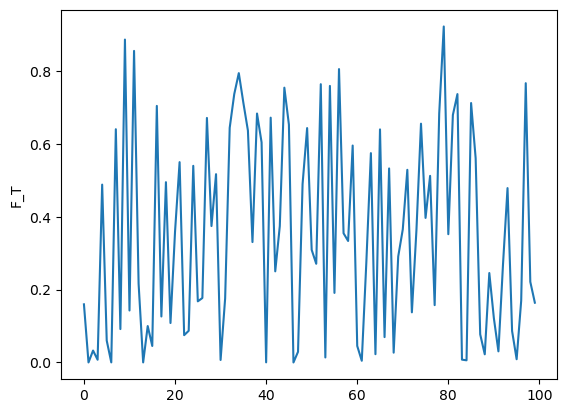

In [196]:
sns.lineplot(df["F_T"])

<Axes: >

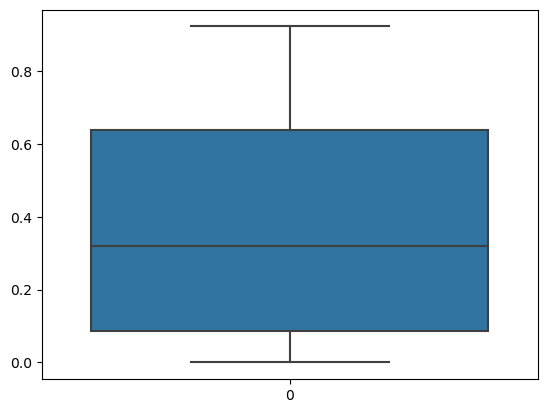

In [200]:
sns.boxplot(df["F_T"])

In [208]:
round(df.describe(),7)

,age,Jrs_delinquance,chomage,L_revenu,Survie,Censure,Censure_new,Log_T,Alpha,F_T
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,47.070000,36.070000,0.490000,11.090416,11.230000,0.800000,0.200000,2.378674,0.083371,0.352146
std,16.576273,6.700302,0.502418,0.305522,14.896176,0.402015,0.402015,0.835016,0.103020,0.278884
min,18.000000,20.000000,0.000000,10.475879,1.000000,0.000000,0.000000,0.261085,0.003379,0.000000
25%,30.000000,32.000000,0.000000,10.852851,2.000000,1.000000,0.000000,1.783987,0.018959,0.086939
50%,47.000000,35.000000,0.000000,11.173182,5.000000,1.000000,0.000000,2.382629,0.048061,0.320102
75%,60.250000,41.000000,1.000000,11.356987,11.250000,1.000000,0.000000,3.112389,0.103005,0.637904
max,77.000000,54.000000,1.000000,11.510974,58.000000,1.000000,1.000000,4.465977,0.717023,0.922995
